### Extra Trees Classification

In [19]:
# imports
import scipy.io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn import linear_model, datasets
from sklearn.preprocessing import label_binarize
from sklearn.model_selection import validation_curve
import warnings
warnings.filterwarnings("ignore")
from sklearn.ensemble import ExtraTreesClassifier

In [20]:
# reads
#file reads
X1 = pd.read_csv('Error_50k+test+10e_may18.csv')
Y = X1['Rating']
X1 = X1.drop('Rating',1)


In [21]:
# split train and test
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
import time

x1_train, x1_test, y1_train, y1_test = train_test_split(X1, Y, train_size=0.8,test_size = 0.2,random_state = 10)


In [22]:
def extra_classifier(n, criterion,x_train,x_test,y_train,y_test, X, Y):
    extra_clf = ExtraTreesClassifier(n_estimators = n, criterion = criterion,random_state = 10)
    start1 = time.clock() 
    extra_clf.fit(x_train,y_train)
    end = (time.clock() - start1)
    scores = cross_val_score(extra_clf, X,Y, cv=10)
    
    print("Training time =", end)
    print("Cross validation score=",scores)
    y_pred = extra_clf.predict(x_test)
    print("Accuracy Score = " ,accuracy_score(y_test, y_pred) )
    print("Confusion Matrix \n")
    print(confusion_matrix(y_test,y_pred))
    print("Classification Report \n")
    print(classification_report(y_test,y_pred))
    y = label_binarize(y_test, classes=[0,1, 2, 3, 4, 5])
    num_classes = y.shape[1]
    pred_roc = extra_clf.predict_proba(x_test)
    print(visualize_results(pred_roc,num_classes,y))
    return extra_clf

In [23]:
# visualize results through ROC
from sklearn.metrics import roc_curve, auc
from itertools import cycle
def visualize_results(pred_roc,num_classes,y):
    unique, counts = np.unique(pred_roc, return_counts=True)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(num_classes):
        fpr[i], tpr[i], _ = roc_curve(y[:, i], pred_roc[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['navy', 'turquoise', 'darkorange', 'aqua', 'teal','green','red','black','brown','pink'])
    plt.figure(figsize=(7, 8))
    f_scores = np.linspace(0.2, 0.8, num=4)
    lines = []
    labels = []
    for f_score in f_scores:
        x = np.linspace(0.01, 1)
        y = f_score * x / (2 * x - f_score)
        l, = plt.plot(x[y >= 0], y[y >= 0], color='gray', alpha=0.2)
        plt.annotate('f1={0:0.1f}'.format(f_score), xy=(0.9, y[45] + 0.02))

    lines.append(l)
    labels.append('iso-f1 curves')

    for i, color in zip(range(num_classes), colors):
        l, = plt.plot(fpr[i], tpr[i], color=color, lw=2)
        lines.append(l)
        labels.append('TPR-FPR for class {0} (area = {1:0.2f})'
                      ''.format(i, roc_auc[i]))

    fig = plt.gcf()
    fig.subplots_adjust(bottom=0.25)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('FPR')
    plt.ylabel('TPR')
    plt.title('Extension of FPR-TPR curve to multi-class')
    plt.legend(lines, labels, loc=(0, -.5), prop=dict(size=14))
    plt.show()


Training time = 16.564520000000016
Cross validation score= [0.77002584 0.78131213 0.78747515 0.78524558 0.79021674 0.7836548
 0.79399483 0.7959833  0.78798727 0.78690808]
Accuracy Score =  0.7823622986677272
Confusion Matrix 

[[ 684  196    0    0    0    0]
 [  79 1801  517  197  154   50]
 [   0  289 2450   47    0    0]
 [   0    6  183 1509   80    0]
 [   0    3    0  106 1039   77]
 [   0    2    0    0  203  386]]
Classification Report 

             precision    recall  f1-score   support

          0       0.90      0.78      0.83       880
          1       0.78      0.64      0.71      2798
          2       0.78      0.88      0.83      2786
          3       0.81      0.85      0.83      1778
          4       0.70      0.85      0.77      1225
          5       0.75      0.65      0.70       591

avg / total       0.79      0.78      0.78     10058



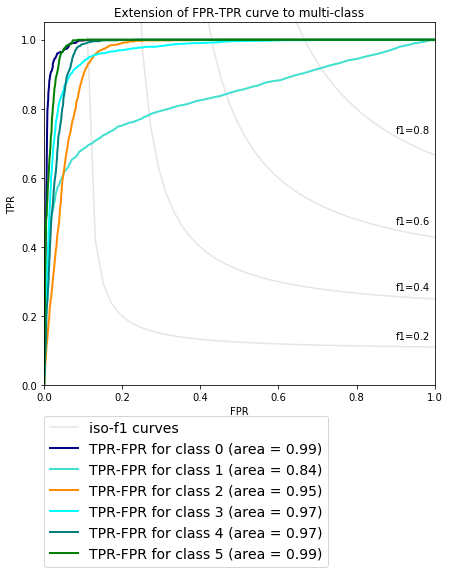

None


In [24]:
extra = extra_classifier(250,'gini',x1_train,x1_test,y1_train,y1_test,X1,Y)